https://github.com/nicknochnack/ActionDetectionforSignLanguage/blob/main/Action%20Detection%20Refined.ipynb - REFERENCE

# 1. IMPORT AND INSTALL DEPENDENCIES

In [20]:
pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tkinter import Tk
from tkinter.filedialog import askopenfilename, askdirectory

# 2. KEYPOINTS USING MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB to BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [6]:
def draw_styled_landmarks(image, results):
    # Check and draw face landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    # Check and draw pose landmarks with styling
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    # Check and draw left hand landmarks with styling
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    # Check and draw right hand landmarks with styling
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model, STOP THIS CELL when you're done and want to capture
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [8]:
draw_landmarks(frame, results)

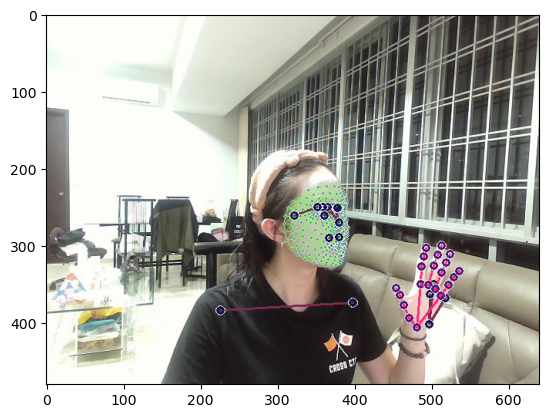

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. EXTRACT KEYPOINT VALUES

In [10]:
len(results.left_hand_landmarks.landmark)

#this line of code actually depends on which hand youre holding up in the frame frozen, if no left hand, value = nonetype

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.59451735,  0.56315267, -0.64688969, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.59451735,  0.56315267, -0.64688969, ...,  0.        ,
        0.        ,  0.        ])

# 4. SETUP FOLDERS FOR COLLECTION

In [19]:
# Actions that we try to detect - edit this array to alphabets/phrases
actions = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [20]:
# Define the path for the MP_Data directory relative to the current directory (to store the dataset)
DATA_PATH = os.path.join(os.getcwd(), 'MP_Data')

# Check if the directory already exists. If not, create it.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    message = f"Directory '{DATA_PATH}' was created."
else:
    message = f"Directory '{DATA_PATH}' already exists."
message

"Directory 'C:\\Users\\aidor\\PYTHON\\Data Mining\\DataMiningProject\\MP_Data' already exists."

In [21]:

# Thirty videos worth of data - adjust accordingly
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30  # Starting index for the new folders to be created

In [22]:
# Ensure DATA_PATH exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # Check if the action directory exists, create it if it doesn't
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    # List directories, assuming they are named with integers, and filter out non-digit names
    existing_dirs = [d for d in os.listdir(action_path) if d.isdigit()]
    
    # Find the maximum directory number if there are any directories present, else use start_folder
    dirmax = max([int(d) for d in existing_dirs], default=start_folder)
    
    # Create new directories starting from dirmax + 1
    for sequence in range(1, no_sequences + 1):
        new_dir = os.path.join(action_path, str(dirmax + sequence))
        os.makedirs(new_dir, exist_ok=True)

# 5A. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING (live feed)

PRESS P TO PAUSE, any key to continue

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder+1, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break or pause gracefully
                key = cv2.waitKey(10)
                if key & 0xFF == ord('q'):
                    break
                elif key & 0xFF == ord('p'):  # 'p' key for pause
                    cv2.waitKey(-1)  # wait until any key is pressed
                    
    cap.release()
    cv2.destroyAllWindows()


KeyboardInterrupt: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 5B. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING (From Video)

In [23]:
# Function to prompt the user to select a video file
def get_video_file():
    Tk().withdraw()  # we don't want a full GUI, so keep the root window from appearing
    filepath = askopenfilename()  # show an "Open" dialog box and return the path to the selected file
    return filepath

In [30]:
# Function definitions for mediapipe_detection, draw_styled_landmarks, and extract_keypoints need to be here
#STOP THIS CELL TO QUIT
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos for each action
        for sequence in range(start_folder + 1, start_folder + no_sequences + 1):
            print(f"Selected video file for action '{action}', Sequence number: {sequence}")
            video_file = get_video_file()
            # Check if the user canceled the selection
            if not video_file:
                print("File selection cancelled. Skipping to next sequence...")
                continue  # Skip the rest of the loop and prompt for the next file
            
            print(f"Selected video file for action '{action}', Sequence number: {sequence} is: {video_file}")
            
            cap = cv2.VideoCapture(video_file)
            
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print("Failed to grab frame. Exiting this sequence...")
                    break
                
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                
                if frame_num == 0:
                    display_text = f'STARTING COLLECTION for {action} Video Number {sequence}'
                else:
                    display_text = f'Collecting frames for {action} Video Number {sequence}'
                
                cv2.putText(image, display_text, (15, 12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                key = cv2.waitKey(10)
                if key & 0xFF == ord('q'):
                    break
                elif key & 0xFF == ord('p'):
                    cv2.waitKey(-1)  # Pause until any key is pressed

            cap.release()
            cv2.destroyAllWindows()

            # If the user presses 'q', break out of all loops
            if key & 0xFF == ord('q'):
                print("Exiting data collection...")
                break
        # If the user presses 'q', break out of the action loop as well
        if key & 0xFF == ord('q'):
            break

Selected video file for action '1', Sequence number: 31
File selection cancelled. Skipping to next sequence...
Selected video file for action '1', Sequence number: 32


KeyboardInterrupt: 

# 6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 '10': 9}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(300, 30, 1662)

In [28]:
np.array(labels).shape

(300,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(300, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
y_test.shape

(15, 10)

# 7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [63]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [64]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [66]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
9/9 [==============================] - 5s 41ms/step - loss: 2.5962 - categorical_accuracy: 0.1263
Epoch 2/2000
9/9 [==============================] - 0s 43ms/step - loss: 2.3057 - categorical_accuracy: 0.0807
Epoch 3/2000
9/9 [==============================] - 0s 41ms/step - loss: 2.3025 - categorical_accuracy: 0.1018
Epoch 4/2000
9/9 [==============================] - 0s 42ms/step - loss: 2.3018 - categorical_accuracy: 0.1018
Epoch 5/2000
9/9 [==============================] - 0s 40ms/step - loss: 2.3022 - categorical_accuracy: 0.0877
Epoch 6/2000
9/9 [==============================] - 0s 40ms/step - loss: 2.2995 - categorical_accuracy: 0.1088
Epoch 7/2000
9/9 [==============================] - 0s 40ms/step - loss: 2.3152 - categorical_accuracy: 0.1263
Epoch 8/2000
9/9 [==============================] - 0s 40ms/step - loss: 2.2800 - categorical_accuracy: 0.1018
Epoch 9/2000
9/9 [==============================] - 0s 40ms/step - loss: 2.4599 - categorical_accuracy: 0.1123
E

KeyboardInterrupt: 

In [61]:
model.summary()

NameError: name 'model' is not defined

# 8. MAKE PREDICTIONS

In [59]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [41]:
actions[np.argmax(res[4])]

'9'

In [56]:
actions[np.argmax(y_test[4])]

'4'

# 9. SAVE WEIGHTS

In [57]:
model.save('action.h5')

NameError: name 'model' is not defined

In [ ]:
del model

In [58]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# 10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [43]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [44]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13.,  0.],
        [ 2.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[13.,  0.],
        [ 2.,  0.]],

       [[13.,  0.],
        [ 2.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[11.,  0.],
        [ 4.,  0.]],

       [[ 0., 15.],
        [ 0.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]]])

In [47]:
accuracy_score(ytrue, yhat)

0.0

# 11. TEST IN REAL TIME

In [48]:
from scipy import stats

In [49]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()